# Tarea 3


## P6

In [ ]:
import camb
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

# Creamos un objeto donde guardaremos los parámetros cosmológicos
pars = camb.CAMBparams()

pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

<module 'gammapy' from 'C:\\Users\\lueiz\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\gammapy\\__init__.py'>
1.0.2


class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.0224
 omch2 = 0.12
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.4
 TCMB = 2.7255
 YHe = 0.24586829360147697
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.96
   nrun = 

In [2]:
z_max=5000
z_min=0

redshifts=np.arange(z_min,z_max,z_max//5)

redshifts

# Set Matter Power Spectrum

pars.set_matter_power(redshifts=[0], kmax=1) # Grandes escalas 

results = camb.get_results(pars)

transf = results.get_matter_transfer_data()

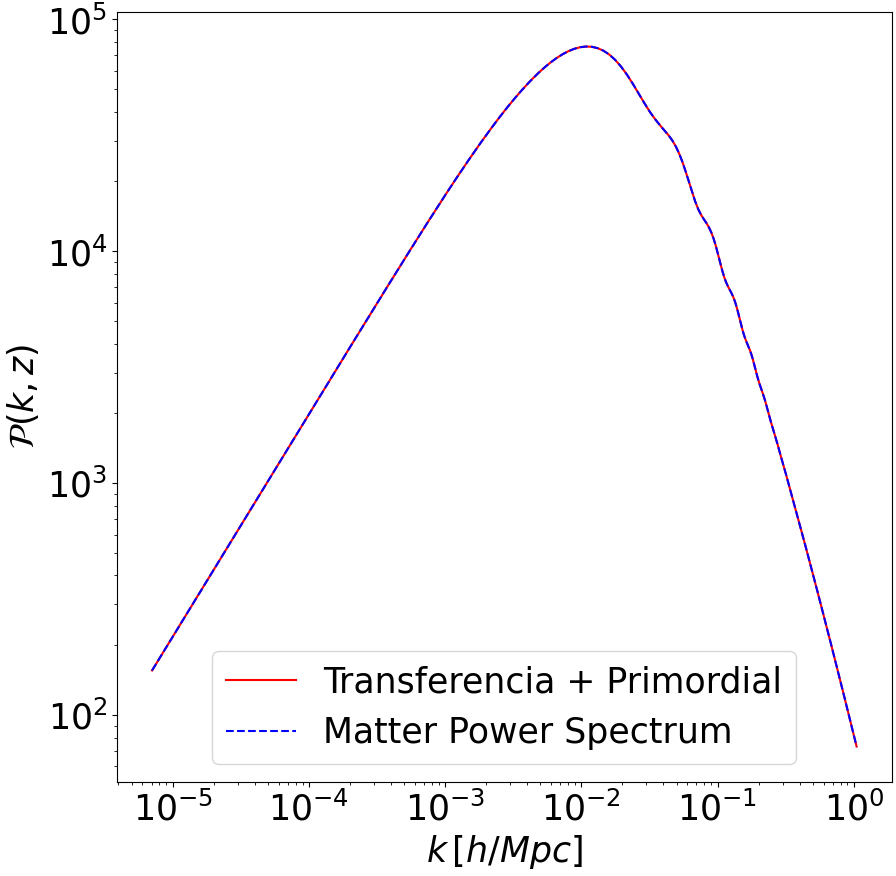

In [3]:
# Ahora obtenemos la función de transferencia

kh = transf.transfer_data[0, :, 0]
k = kh * results.Params.h  # Necesitamos transformar los datos, pues el resultado está en h/Mpc

transfer = transf.transfer_data[camb.model.Transfer_tot-1,:,0]

primordial_PK = results.Params.scalar_power(k) #Obtenemos el espectro de potencia primordial

# All together
matter_power = primordial_PK * transfer**2 * k**4 / (k**3/(2*np.pi**2))

kh2, zs, PK = results.get_linear_matter_power_spectrum(hubble_units=False, k_hunit=False)

plt.figure(figsize=(10,10))
plt.loglog(k, matter_power, c='r', label='Transferencia + Primordial')
plt.loglog(kh2, PK[0, :], c='b', ls='--',label='Matter Power Spectrum')

plt.legend(fontsize=25)
plt.ylabel(r"$\mathcal{P}(k, z)$", fontsize=25)
plt.xlabel(r'$k\, [h/Mpc]$', fontsize=25)
plt.style.use(['science'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.show()